In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T = 100
np.random.seed(0)

ϵ_μ = np.random.normal(0, 0.05, T+1)
ϵ_g = np.zeros(T+1)

α = 0.1 # Persistence of monetary shocks
β = 0.1 # Persistence of productivity shocks
λ = 0.1 # Speed of price convergence

ø = 1 # Real money demand elasticity wrt to income
η = 0.2 # Real money demand elasticity wrt to the nominal interest rate

g = 0 # Output growth trend
μ = 0 # Money supply growth trend

i_star = 0 # Foreign interest rate
p_star = 0 # Foreign price level

In [4]:
def flex_price(T, α, β, λ, η, ø, g, μ, i_star, p_star):
    
    p = np.zeros(T+1)
    e = np.zeros(T+1)
    i = np.zeros(T+1)
    m = np.zeros(T+1)
    y = np.zeros(T+1)    

    exp_m = np.zeros(T+1)
    exp_y = np.zeros(T+1)
    exp_e = np.zeros(T+1)
    exp_p = np.zeros(T+1)
    exp_μ = np.zeros(T+1)
    exp_g = np.zeros(T+1)
    
    for t in range(2,T+1):
    
        m[t] = m[t-1] + α*(m[t-1] - m[t-2]) + ϵ_μ[t] + μ
        y[t] = y[t-1] + β*(y[t-1] - y[t-2]) + ϵ_g[t] + g
       
        
        exp_μ[t] = α*(m[t] - m[t-1]) + μ
        exp_g[t] = β*(y[t] - y[t-1]) + g
       
        
        i[t] = i_star + exp_μ[t] - ø*exp_g[t]
        p[t] = (m[t] - ø*y[t] + η*i[t])
        e[t] = p[t] - p_star
        
    return m, i, p, e, y

In [5]:
def sticky_price(T, α, β, λ, η, ø, g, μ, i_star, p_star):
    
    p = np.zeros(T+1)
    e = np.zeros(T+1)
    i = np.zeros(T+1)
    m = np.zeros(T+1)
    y = np.zeros(T+1)    

    exp_m = np.zeros(T+1)
    exp_y = np.zeros(T+1)
    exp_e = np.zeros(T+1)
    exp_p = np.zeros(T+1)
    exp_μ = np.zeros(T+1)
    exp_g = np.zeros(T+1)
    
    for t in range(1,T+1):
        
        m[t] = m[t-1] + α*(m[t-1] - m[t-2]) + ϵ_μ[t] + μ
        y[t] = y[t-1] + β*(y[t-1] - y[t-2]) + ϵ_g[t] + g
        
        exp_m[t] = m[t] + α*(m[t] - m[t-1]) + μ
        exp_y[t] = y[t] + β*(y[t] - y[t-1]) + g
        
        for j in range(1, 1000):
            i[t] = (p[t] - m[t] + ø*y[t]) / η
            e[t] = i_star - i[t] + exp_e[t]
            p[t] = λ*(e[t] + p_star) + (1-λ)*p[t-1]
            exp_e[t] = e[t] + i_star - (exp_p[t] - exp_m[t] + ø*exp_y[t]) / η
            exp_p[t] = λ*(exp_e[t] + p_star) + (1-λ)*p[t]
        
    return m, i, p, e, y

In [6]:
m_s, i_s , p_s, e_s, y_s = sticky_price(T, α, β, λ, η, ø, g, μ, i_star, p_star)
m_f, i_f, p_f, e_f, y_f = flex_price(T, α, β, λ, η, ø, g, μ, i_star, p_star)

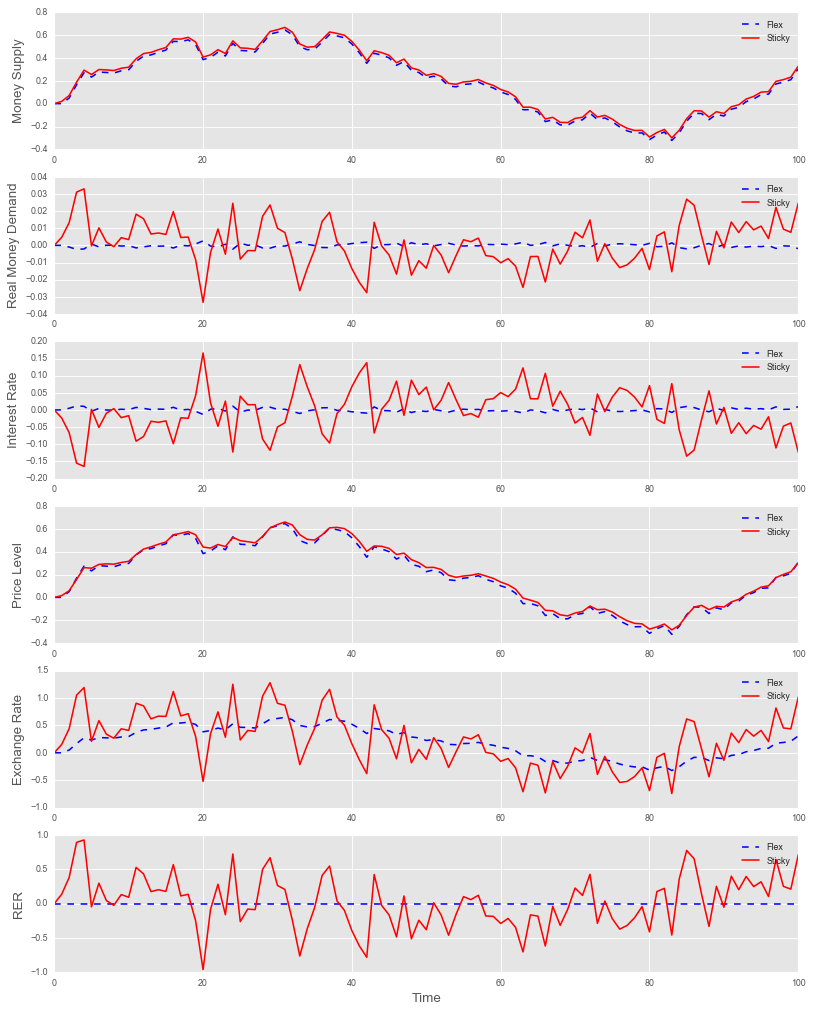

In [70]:
fig = plt.figure(figsize=(12,15))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)


ax1.plot(m_f, 'b--', label="Flex")
ax1.plot(m_s, 'r-', label="Sticky")
ax1.set_ylabel("Money Supply")
ax1.legend()

ax2.plot(m_f-p_f, 'b--', label="Flex")
ax2.plot(m_s-p_s, 'r-', label="Sticky")
ax2.set_ylabel("Real Money Demand")
ax2.legend()

ax3.plot(i_f, 'b--', label="Flex")
ax3.plot(i_s, 'r-', label="Sticky")
ax3.set_ylabel("Interest Rate")
ax3.legend()


ax4.plot(p_f, 'b--', label="Flex")
ax4.plot(p_s, 'r-', label="Sticky")
ax4.set_ylabel("Price Level")
ax4.legend()

ax5.plot(e_f, 'b--', label="Flex")
ax5.plot(e_s, 'r-', label="Sticky")
ax5.set_ylabel("Exchange Rate")
ax5.legend()

ax6.plot(e_f-p_f, 'b--', label="Flex")
ax6.plot(e_s-p_s, 'r-', label="Sticky")
ax6.set_ylabel("RER")
ax6.legend()
ax6.set_xlabel("Time")

plt.show()